In [1]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xlrd
import csv
import csv

In [2]:
df = pd.read_csv("file.csv")
df.head()

Index company           location          dates  \
0      1  google               none   Dec 11, 2018   
1      2  google  Mountain View, CA   Jun 21, 2013   
2      3  google       New York, NY   May 10, 2014   
3      4  google  Mountain View, CA    Feb 8, 2015   
4      5  google    Los Angeles, CA   Jul 19, 2018   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   
3     Current Employee - Anonymous Employee   
4       Former Employee - Software Engineer   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                      advice-to-mgmt  overall-ratings  \
0                                               none                5   
1  1) Don't dismiss emotional intelligence and ad...                4   
2  Keep the focus on the user. Everything else wi...                5   
3  Keep on NOT micromanaging - that is a huge ben...                5   
4  Promote managers into management for their man...                5   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                  4                    5                          5   
1                  2                    3                          3   
2                  5                    4                          5   
3                  2                    5                          5   
4                  5                    5                          5   

  comp-benefit-stars senior-mangemnet-stars  helpful-count  \
0                  4                      5              0   
1                  5                      3           2094   
2                  5                      4            949   
3                  4                      5            498   
4                  5                      5             49   

                                                link  
0  https://www.glassdoor.com/Reviews/Google-Revie...  
1  https://www.glassdoor.com/Reviews/Google-Revie...  
2  https://www.glassdoor.com/Reviews/Google-Revie...  
3  https://www.glassdoor.com/Reviews/Google-Revie...  
4  https://www.glassdoor.com/Reviews/Google-Revie...

In [3]:
df.groupby('company').size()  # classify based on column company 

company
amazon       26430
apple        12950
facebook      1590
google        7819
microsoft    17930
netflix        810
dtype: int64

In [4]:
def plot_heatmap(dataCol1, dataCol2, heading):
    grpby = df.groupby([dataCol1, dataCol2]).size()
    pct = grpby.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))
    unstk_data = pct.unstack()
    fig, ax = plt.subplots()
    sns.heatmap(unstk_data, annot=True, linewidths=.5, ax=ax, cmap='YlGn')
    ax.set_title(heading)
    fig.tight_layout()
    plt.show()

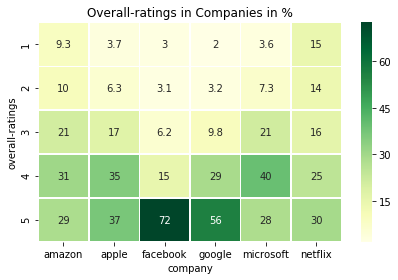

In [5]:
plot_heatmap('overall-ratings','company', 'Overall-ratings in Companies in %' )
# Assuming 4 and above to be very good rating, and less than 
#4 to be not so good, some observations from the above plot are:
# 72% people in FB have rated it 5 and overall 87% people are very happy working in FB. This is followed by Gogle with 85%
# NetFlix has got a 55-45% which means people have neutral say about the company
# 60% people are happy with Amazon
# 72% people are happy with Apple
# 68% people are happy with Microsoft

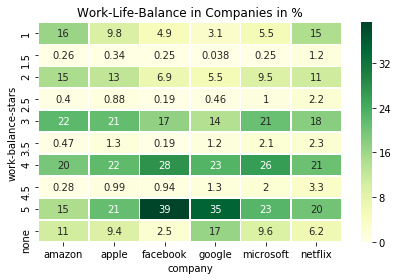

In [6]:
plot_heatmap('work-balance-stars','company', 'Work-Life-Balance in Companies in %' )
# Assuming 4 and above to be very good rating, and less than 4 to be not so good, some observations from the above plot are for Work/Life Balance
# 46.2% people in amazon have a W/L balance
# 54% apple
# 70.5% FB
# 76.3% Google
# 60.6% Microsoft
# 50.5% Netflix

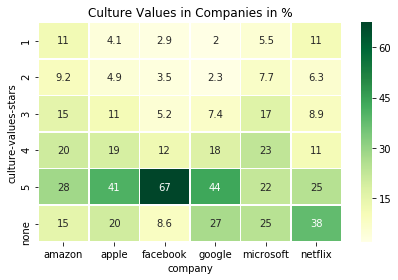

In [7]:
plot_heatmap('culture-values-stars','company', 'Culture Values in Companies in %' )

# In cultural values,
# Facebook leads with 89%
# Amazon 48%
# Apple 60%
# GOogle 62%
# Microsoft 45%
# Netflix 36%


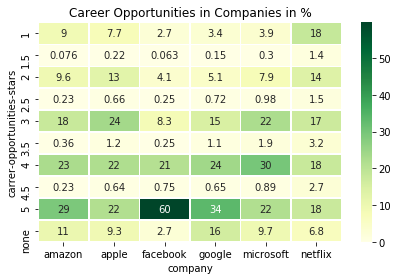

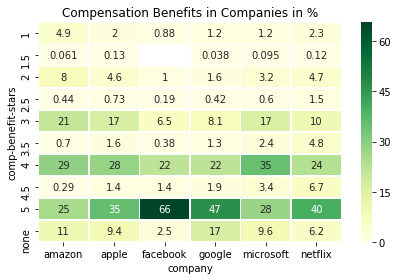

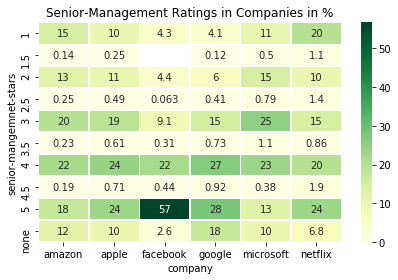

In [8]:
plot_heatmap('carrer-opportunities-stars','company', 'Career Opportunities in Companies in %' )
plot_heatmap('comp-benefit-stars','company', 'Compensation Benefits in Companies in %' )
plot_heatmap('senior-mangemnet-stars','company', 'Senior-Management Ratings in Companies in %' )


amazon


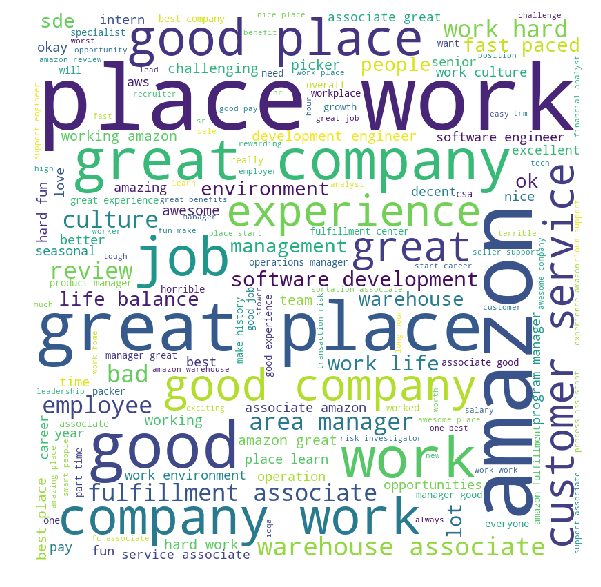

cons


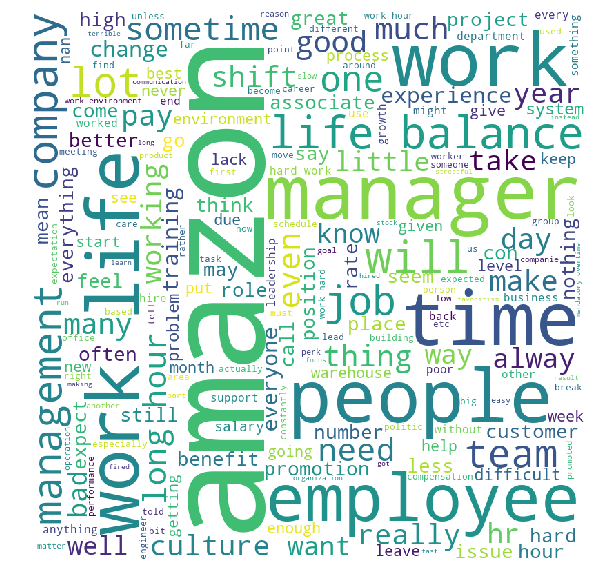

pros


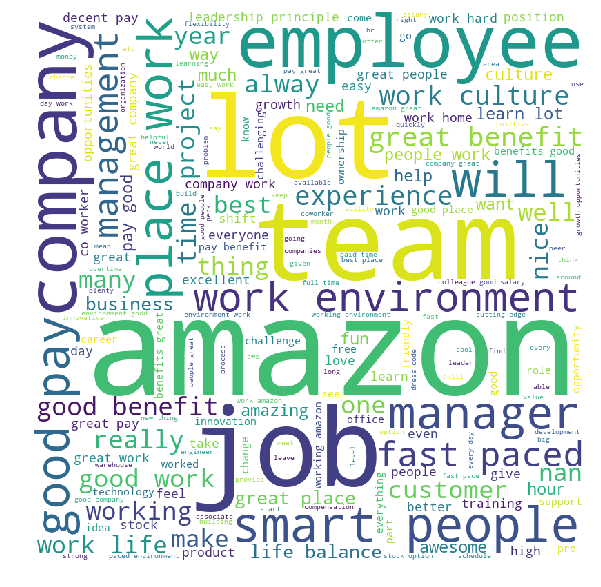

Advice to Management


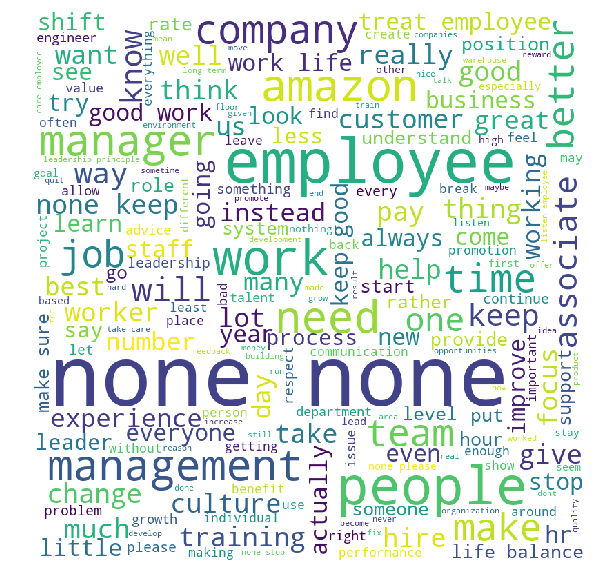

apple


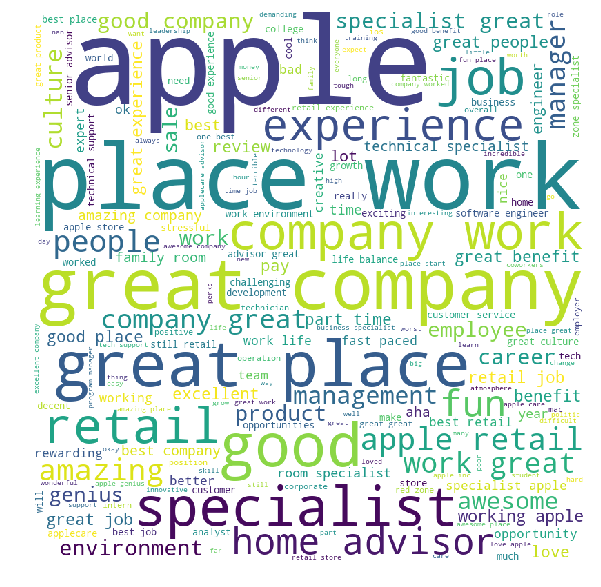

cons


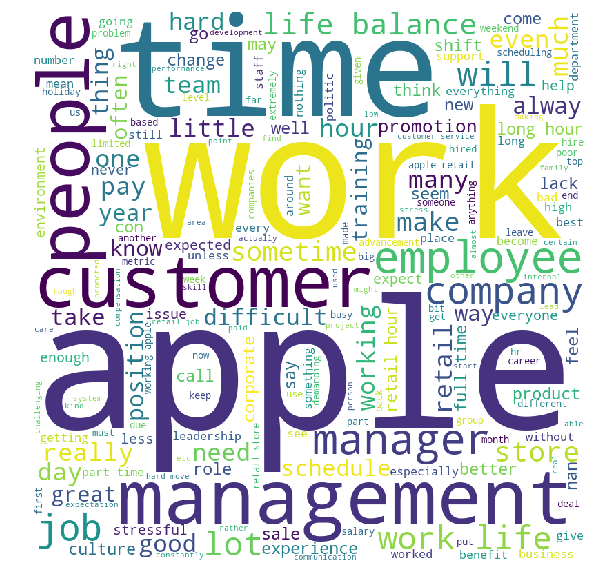

pros


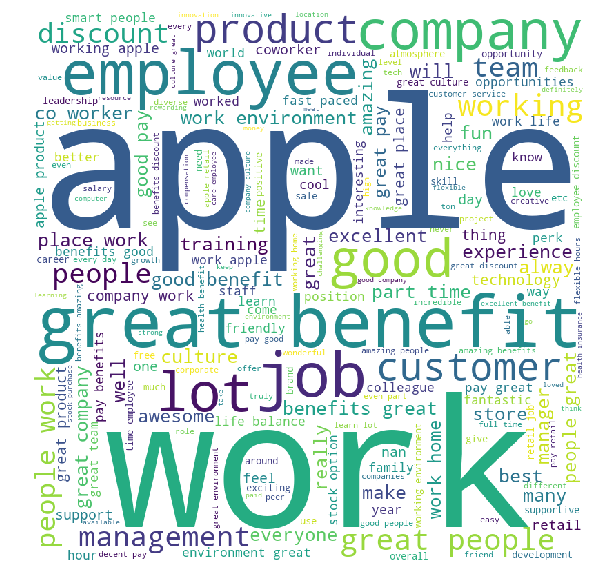

Advice to Management


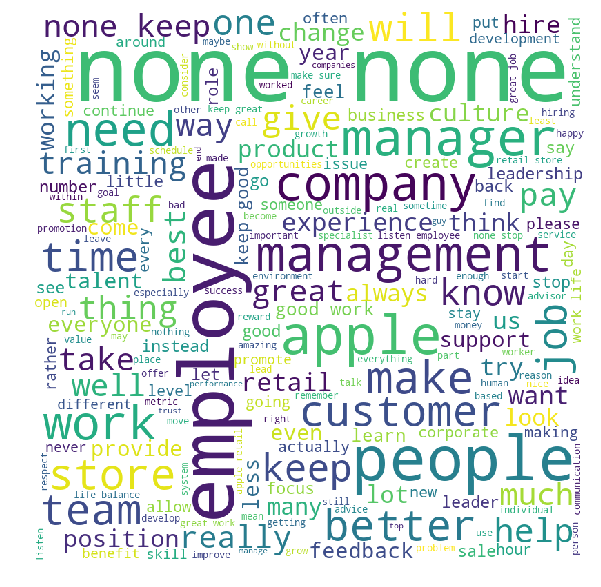

facebook


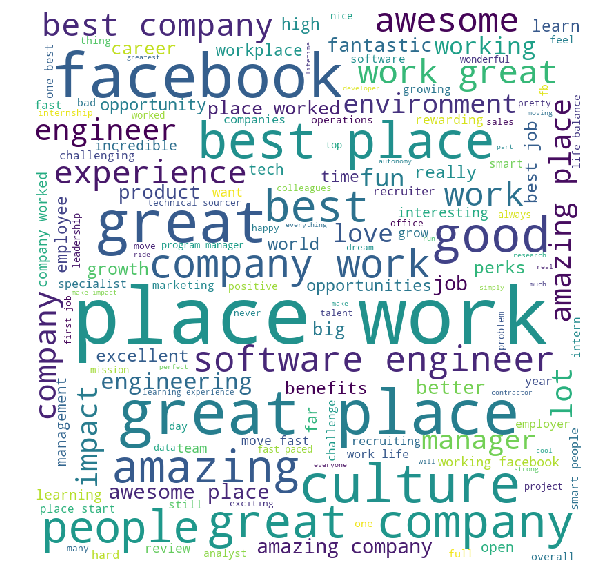

cons


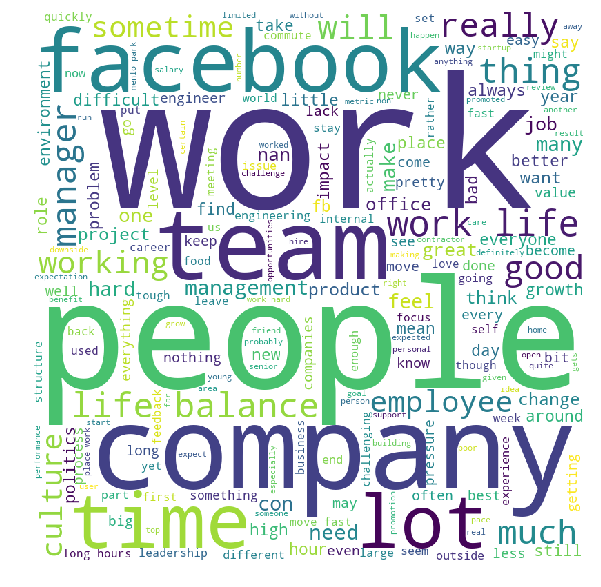

pros


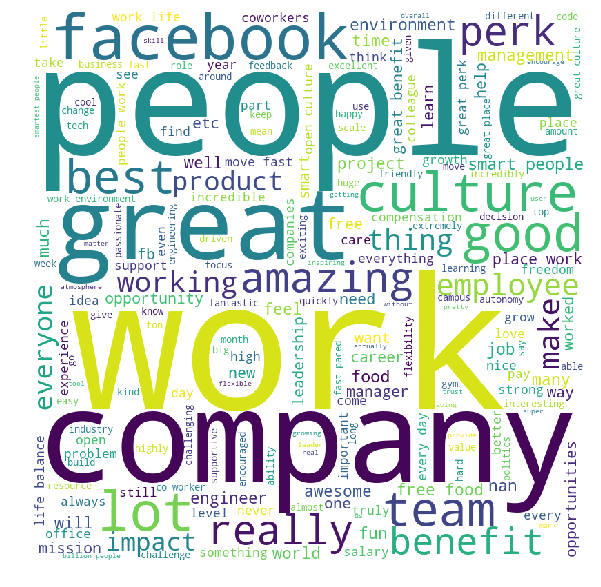

Advice to Management


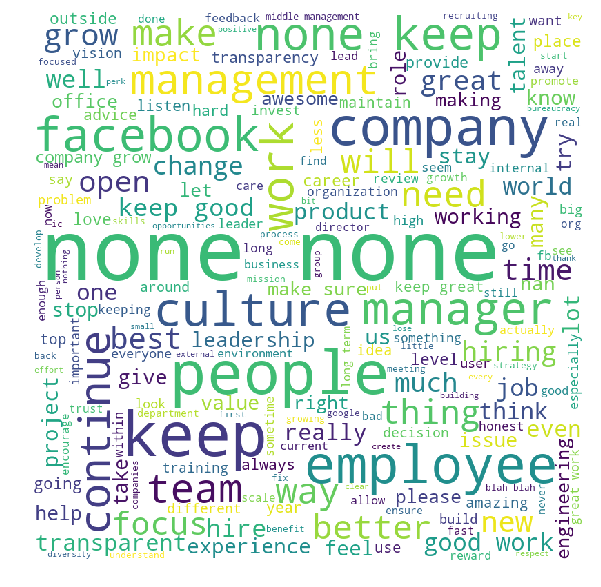

google


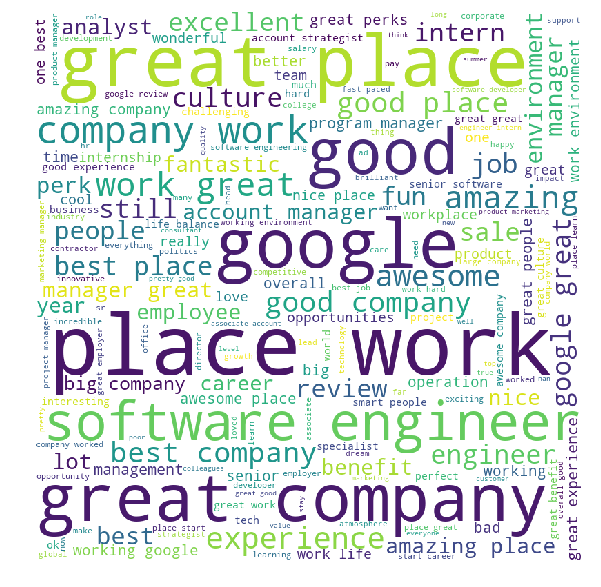

cons


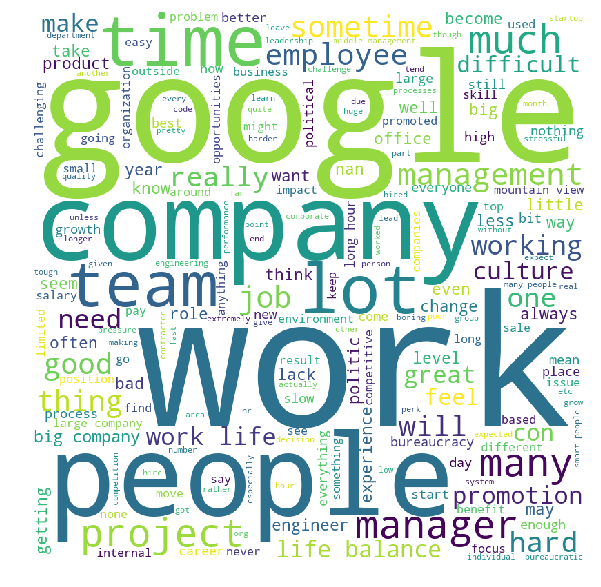

pros


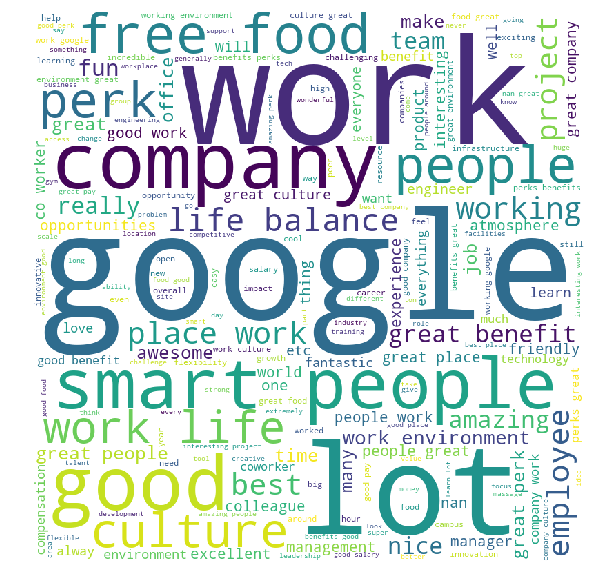

Advice to Management


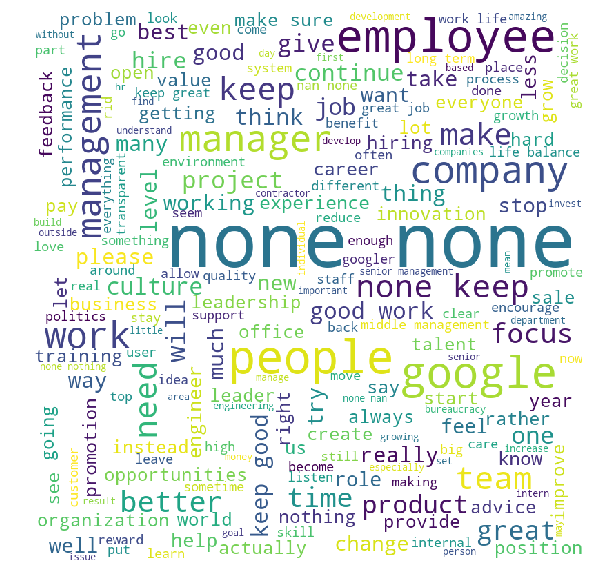

microsoft


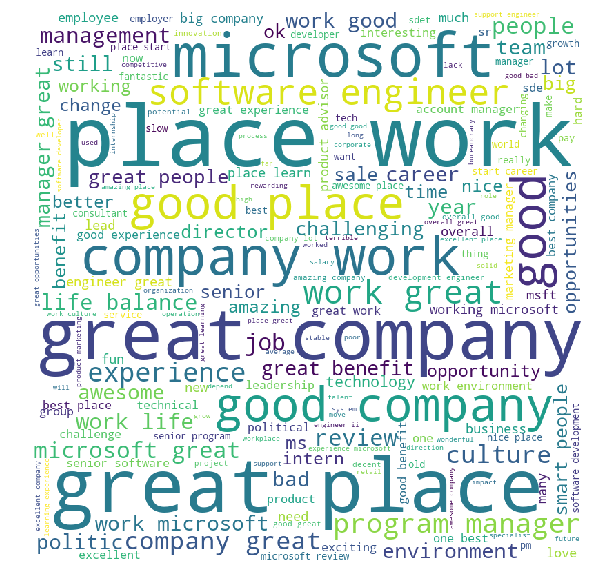

cons


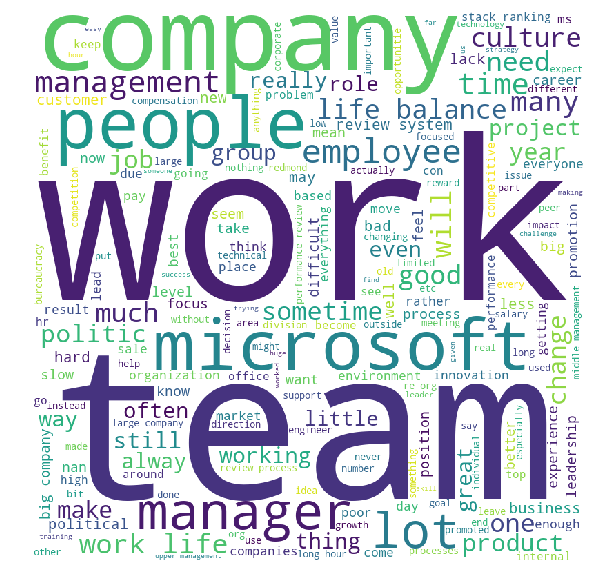

pros


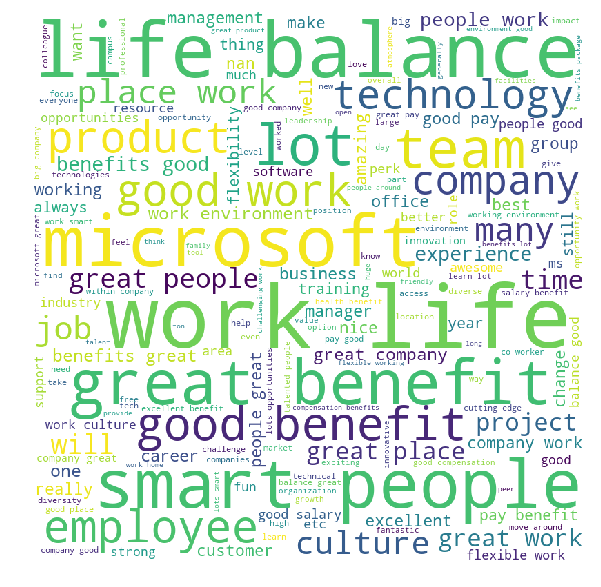

Advice to Management


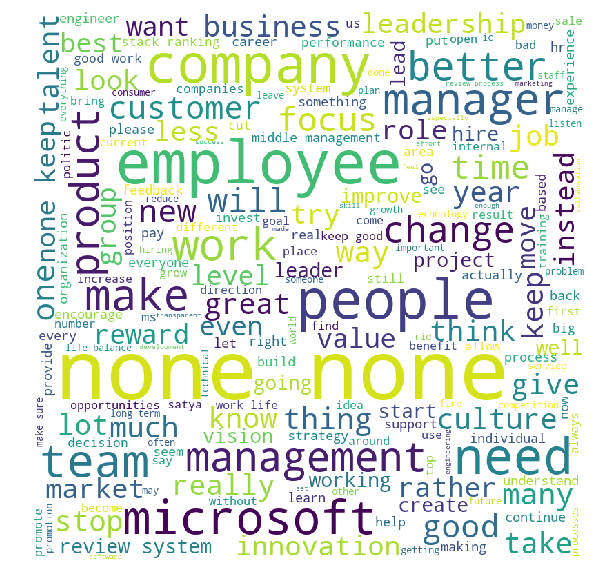

netflix


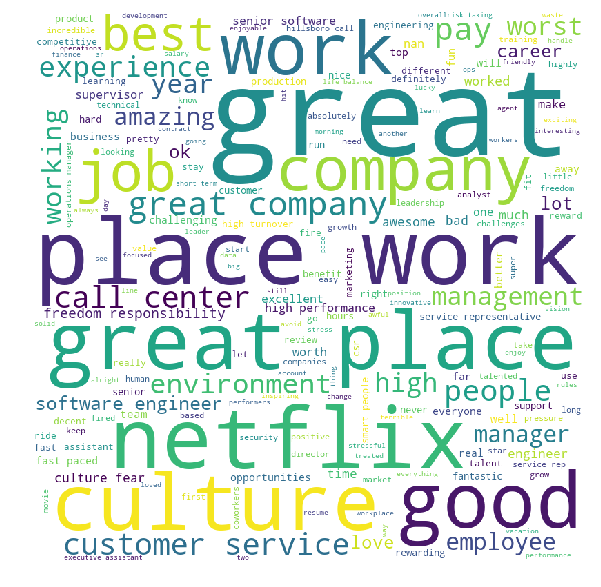

cons


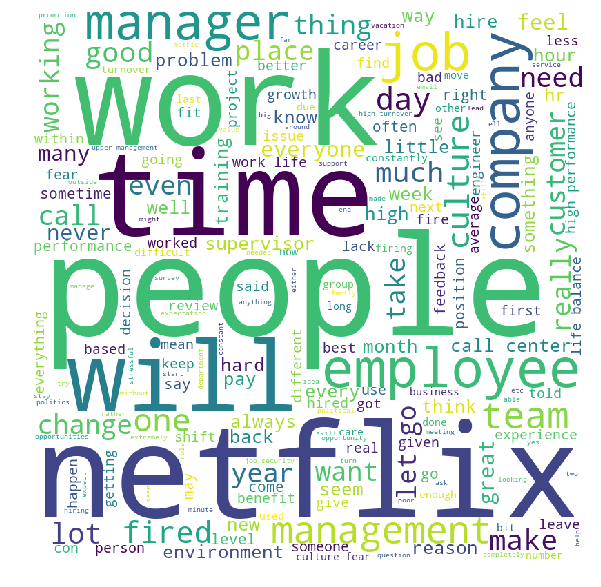

pros


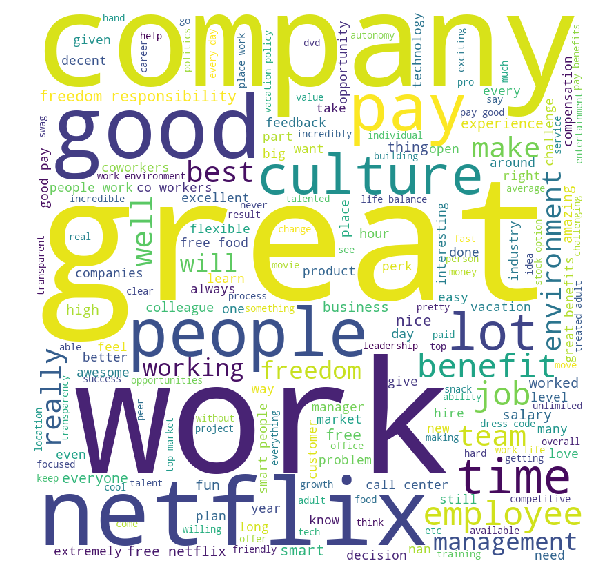

Advice to Management


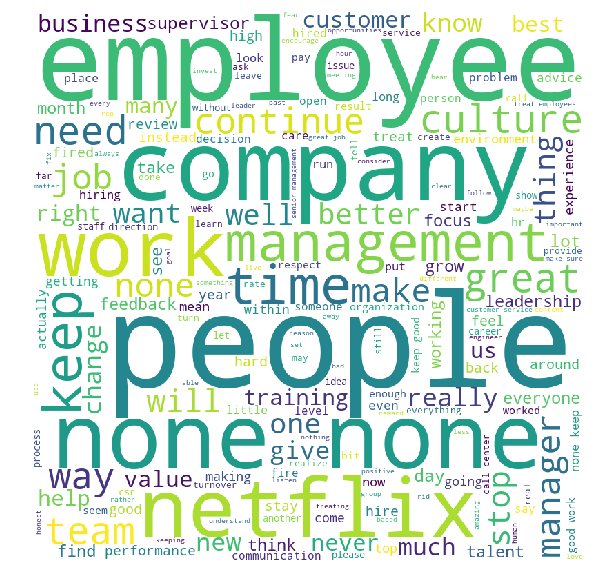

In [9]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

def generate_word_cloud(text):  
    comment_words = ' '
    stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '
        
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

grouped = df.groupby('company')

for name,group in grouped:
    print (name)
    generate_word_cloud(group['summary'])
    print('cons')
    generate_word_cloud(group['cons'])
    print('pros')
    generate_word_cloud(group['pros'])
    print('Advice to Management')
    generate_word_cloud(group['advice-to-mgmt'])
    



In [53]:
#Define a function to get rid of stopwords present in the messages
from nltk.corpus import stopwords
import string

def message_text_process(mess):
    # Check characters to see if there are punctuations
    no_punctuation = [char for char in mess if char not in string.punctuation]
    # now form the sentence.
    no_punctuation = ''.join(no_punctuation)
    # Now eliminate any stopwords

    return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]    


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(analyzer=message_text_process)

In [55]:
n_top_words = 20
lda = LatentDirichletAllocation()

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [56]:
def find_top_comments(corpus):
    tfidf_transformer = vectorizer.fit_transform(corpus)
    tf_feature_names = vectorizer.get_feature_names()    
    lda.fit_transform(tfidf_transformer)
    print_top_words(lda, tf_feature_names, n_top_words)

In [58]:
find_top_comments(df['cons'])

TypeError: 'float' object is not iterable